# 數位訊號處理 Digital Signal Processing

## 雜訊 Noise

### 雜/噪訊 Noise

In [1]:
from __future__ import print_function, division

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import thinkdsp
import thinkplot
import thinkstats2 

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

### 無關均勻白噪 Uncorrelated Uniform Noises (UUN)

白噪音 Aka (Also known as) white noise, think about you mixing every frequency of light. What would you get?

In [2]:
thinkdsp.random_seed(17)

The simplest noise to generate is uncorrelated uniform (UU) noise:

In [3]:
signal = thinkdsp.UncorrelatedUniformNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

> 噪訊定義 Defintion of noises

It has two different senses:

1. As in English, it can mean an unwanted signal of any kind. If two signals interfere with each other, each signal would consider the other to be noise.

2. “Noise” also refers to a signal that contains components at many frequencies, so it lacks the harmonic structure of the periodic signals we saw in previous chapters.

Here's what a segment of it looks like:

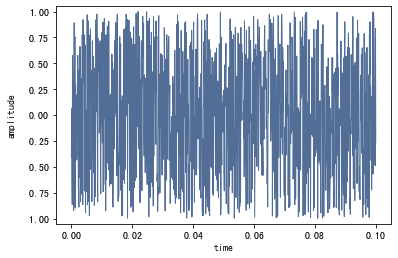

In [4]:
segment = wave.segment(duration=0.1)
segment.plot(linewidth=1)
thinkplot.config(xlabel='time',
                 ylabel='amplitude',
                 ylim=[-1.05, 1.05],
                 legend=False)

噪訊頻譜圖中許多頻段都有成份！ And here's the spectrum:

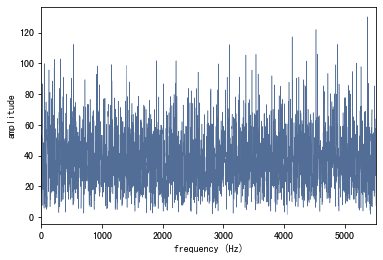

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, spectrum.fs[-1]])

將振幅換成功率 In the context of noise it is more conventional to look at the spectrum of power (instead of strength), which is the square of amplitude:

$power = amplitude ^ {2}$ 功率是振幅的平方

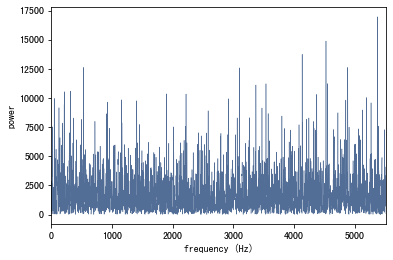

In [6]:
spectrum.plot_power(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='power',
                 xlim=[0, spectrum.fs[-1]])

UU noise has the same power at all frequencies, on average, which we can confirm by looking at the normalized cumulative sum of power, which I call an integrated spectrum (積分頻譜: 累積功率 versus 頻率):

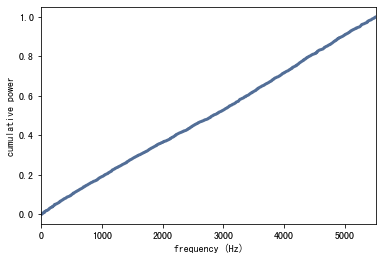

In [7]:
integ = spectrum.make_integrated_spectrum()
integ.plot_power()
thinkplot.config(xlabel='frequency (Hz)',
                ylabel='cumulative power',
                xlim=[0, spectrum.fs[-1]])

直線代表無關均勻噪訊在各頻率上的功率相等，如果類比到光學上，就代表是白光，故名白噪音

A straight line in this figure indicates that UU noise has equal power at all frequencies, on average.  By analogy with light, noise with this property is called "white noise". (All lights mixed together we get white light.)

### Brownian noise (布朗噪訊 aka Red noise)

布朗噪訊將一系列隨機漫步加總起來 Brownian noise is generated by adding up a sequence of **random steps** (or **random walks**).

隨機漫步

In [8]:
signal = thinkdsp.BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

The sound is less bright, or more muffled, than white noise.

Here's what the wave looks like: (attention to the drift 飄移)

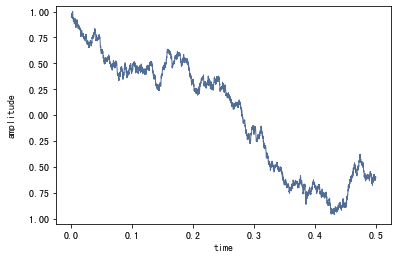

In [9]:
wave.plot(linewidth=1)
thinkplot.config(xlabel='time',
                 ylabel='amplitude',
                 ylim=[-1.05, 1.05])

線性尺度下的功率頻譜 Here's what the power spectrum looks like on a linear scale.

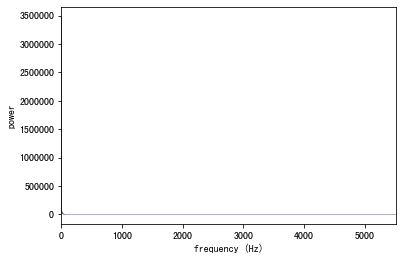

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='power',
                 xlim=[0, spectrum.fs[-1]])

許多能量在低頻域上 So much of the energy is at low frequencies, we can't even see the high frequencies.

對數尺度會有較佳的檢視效果 We can get a better view by plotting the power spectrum on a log-log scale (對數尺度).

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


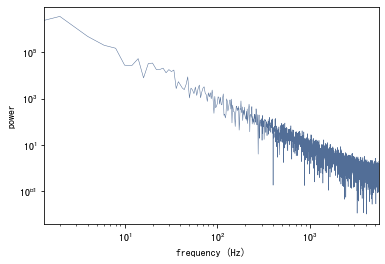

In [11]:
# The f=0 component is very small, so on a log scale
# it's very negative.  If we clobber it before plotting,
# we can see the rest of the spectrum better.
spectrum.hs[0] = 0

spectrum.plot_power(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='power',
                 xscale='log',
                 yscale='log',
                 xlim=[0, spectrum.fs[-1]])

上圖的數學關係式為何?

Now the relationship between power and frequency is clearer.  The slope of this line is approximately -2, which indicates that $P = K / f^2$, for some constant $K$.

In [12]:
signal = thinkdsp.BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
spectrum = wave.make_spectrum()
result = spectrum.estimate_slope()
result.slope

-1.7846032211221763

上圖的斜率估計值大約是-1.8

### 粉紅噪

粉紅噪的參數是$\beta$，其值介於0到2，$\beta=0$時為白噪

In [13]:
from thinkdsp import PinkNoise
signal = thinkdsp.PinkNoise(beta=0)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

$\beta$為1時 With $\beta=1$, pink noise has the relationship $P = K / f$, which is why it is also called $1/f$ noise.

In [14]:
signal = thinkdsp.PinkNoise(beta=1)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

With $\beta=2$, we get Brownian (aka red) noise.

In [15]:
signal = thinkdsp.PinkNoise(beta=2)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

下圖顯示白噪、粉紅噪、紅噪的功率譜(對數-對數尺度)

The following figure shows the power spectrums for white, pink, and red noise on a log-log scale.

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

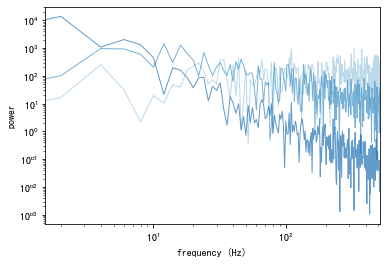

In [16]:
colors = ['#9ecae1', '#4292c6', '#2171b5']
betas = [0, 1, 2]

for beta, color in zip(betas, colors):
    signal = thinkdsp.PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5, framerate=1024)
    spectrum = wave.make_spectrum()
    spectrum.hs[0] = 0
    spectrum.plot_power(linewidth=1, color=color)
    
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='power',
                 xscale='log',
                 yscale='log',
                 xlim=[0, spectrum.fs[-1]])

### 無關高斯噪訊 Uncorrelated Gaussian noise

An alternative to UU noise is uncorrelated Gaussian (UG noise).

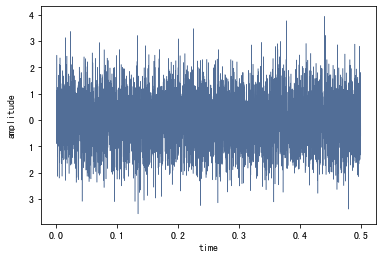

In [17]:
signal = thinkdsp.UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.plot(linewidth=0.5)
thinkplot.config(xlabel='time',
                 ylabel='amplitude')

The spectrum of UG noise is also UG noise.

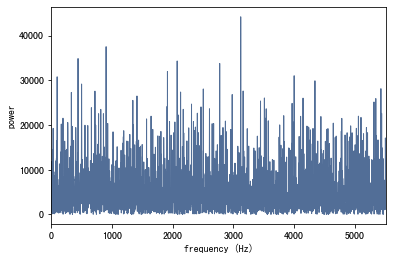

In [18]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=1)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='power',
                 xlim=[0, spectrum.fs[-1]])

We can use a **normal probability plot (常態機率繪圖)** to test the distribution of the power spectrum.

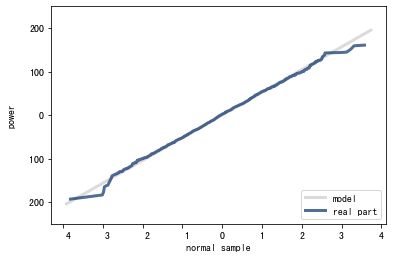

In [19]:
from thinkstats2 import NormalProbabilityPlot

NormalProbabilityPlot(spectrum.real, label='real part')
thinkplot.config(xlabel='normal sample',
                 ylabel='power',
                 ylim=[-250, 250],
                 legend=True,
                 loc='lower right')

A straight line on a normal probability plot indicates that the distribution of the real part of the spectrum is Gaussian.

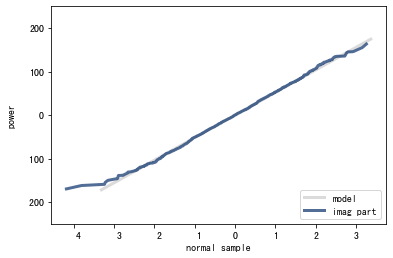

In [20]:
NormalProbabilityPlot(spectrum.imag, label='imag part')
thinkplot.config(xlabel='normal sample',
                 ylabel='power',
                 ylim=[-250, 250],
                 legend=True,
                 loc='lower right')

And so is the imaginary part.

### 參考文獻：

Downey, A.B. (2014), Think DSP: Digital Signal Processing in Python, Green Tea Press.

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)